In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [4]:
df=pd.read_csv("StudentsPerformance.csv")

In [5]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.shape

(1000, 8)

1. Checking missing values 

In [11]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

2. Checking duplicate values 

In [12]:
df.duplicated().sum()

0

3. Check data types 


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Check statistics 

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Insight- i) all  the means are very close to each other 
ii) all the standard deviations are close to each other 
iii) while there is a minimum score 0 for math , for writing the minimum score being 17 and for the reading it remains as 17

exploring the data 

In [22]:
print("categories in gender:")
print(df["gender"].unique())


print("categories in race/ethnicity:")
print(df["race/ethnicity"].unique())

print("categories in parental level of education:")
print(df["parental level of education"].unique())

print("categories in lunch:")
print(df["lunch"].unique())

print("categories in test preparation course:")
print(df["test preparation course"].unique())


categories in gender:
['female' 'male']
categories in race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch:
['standard' 'free/reduced']
categories in test preparation course:
['none' 'completed']


In [23]:
numeric_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']

In [24]:
print("We have {} numerical feature: {}".format(len(numeric_feature),numeric_feature))

We have 3 numerical feature: ['math score', 'reading score', 'writing score']


In [25]:
print("We have {} categorical feature: {}".format(len(categorical_feature),numeric_feature))

We have 5 categorical feature: ['math score', 'reading score', 'writing score']


Adding columns for total score and average 

In [26]:
df["total score"]=df["math score"]+df["reading score"]+df["writing score"]
df["average"]=df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
reading_full=df[df["reading score"]==100]["average"].count()
writing_full=reading_full=df[df["writing score"]==100]["average"].count()
math_full=reading_full=df[df["math score"]==100]["average"].count()



In [28]:
print("The number of students with full marks in reading is ", reading_full)
print("The number of students with full marks in writing is",writing_full)
print("The number of students with full marks in math is",math_full)

The number of students with full marks in reading is  7
The number of students with full marks in writing is 14
The number of students with full marks in math is 7


Insight: the students have performed better in their writing exam 

Exploring data -Visualisation 

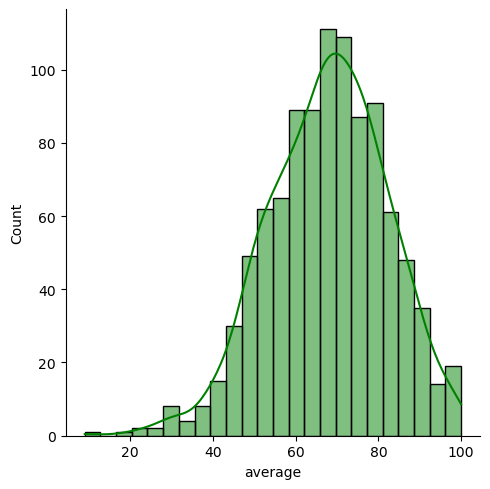

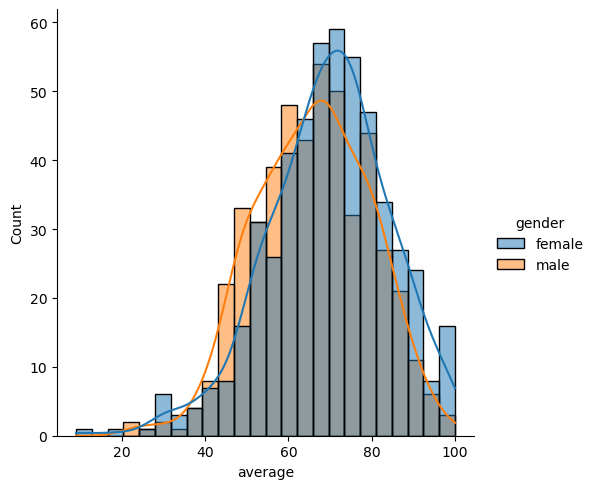

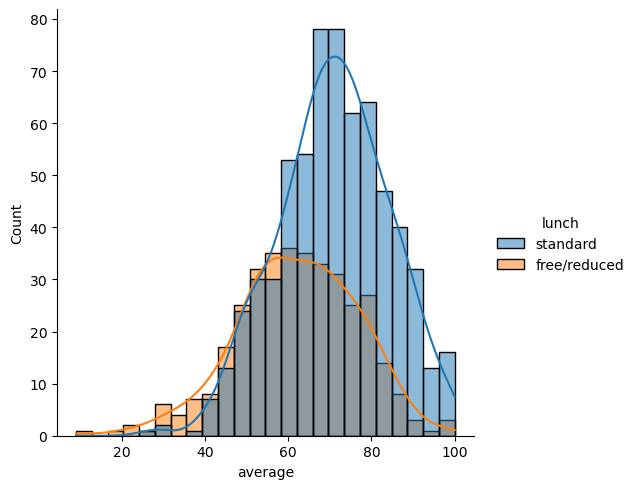

In [37]:


sns.displot(x="average",kde=1,color='g',data=df)


sns.displot(data=df,x="average",kde=1,hue="gender")


sns.displot(data=df,x="average",kde=1,hue="lunch")




insight: 
standard lunch helps better perform


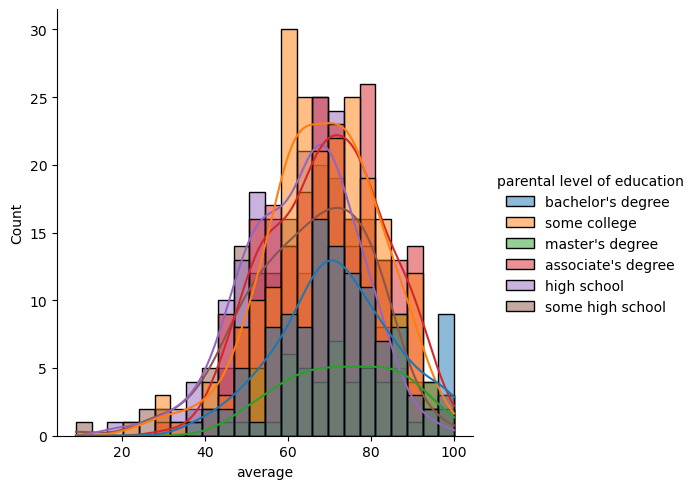

In [39]:
sns.displot(data=df,x="average",kde=1,hue="parental level of education")

insight:
parents education doesnt help studets perform well in exam

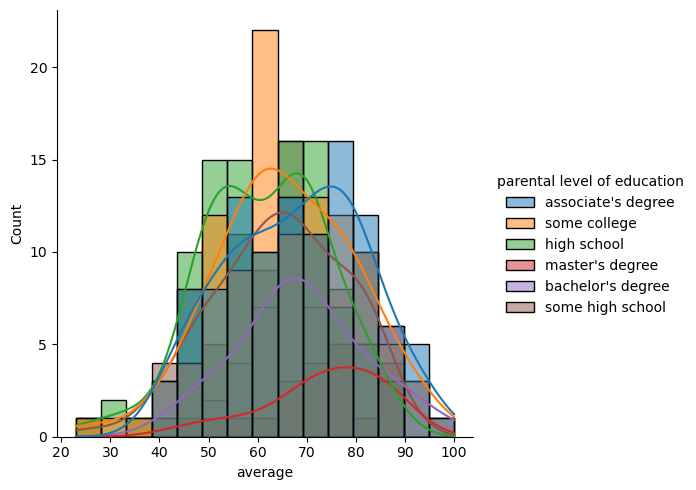

In [40]:
sns.displot(data=df[df.gender=="male"],x="average",kde=1,hue="parental level of education")

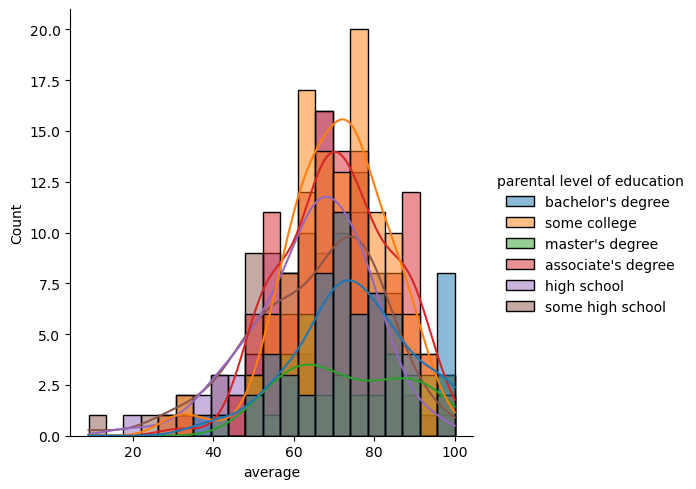

In [41]:
sns.displot(data=df[df.gender=="female"],x="average",kde=1,hue="parental level of education")

<Axes: title={'center': 'Writing score'}, ylabel='writing score'>

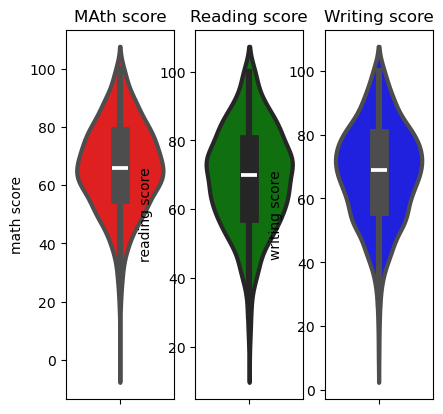

In [48]:
  
plt.subplot(1,4,1)
plt.title("MAth score")
sns.violinplot(data=df,y="math score",color="red",linewidth=3)

plt.subplot(1,4,2)
plt.title("Reading score")
sns.violinplot(data=df,y="reading score",color="green",linewidth=3)

plt.subplot(1,4,3)
plt.title("Writing score")
sns.violinplot(data=df,y="writing score",color="blue",linewidth=3)

insight: most of the students scored in the range 60 to 80 range

(-1.25, 1.25, -1.25, 1.25)

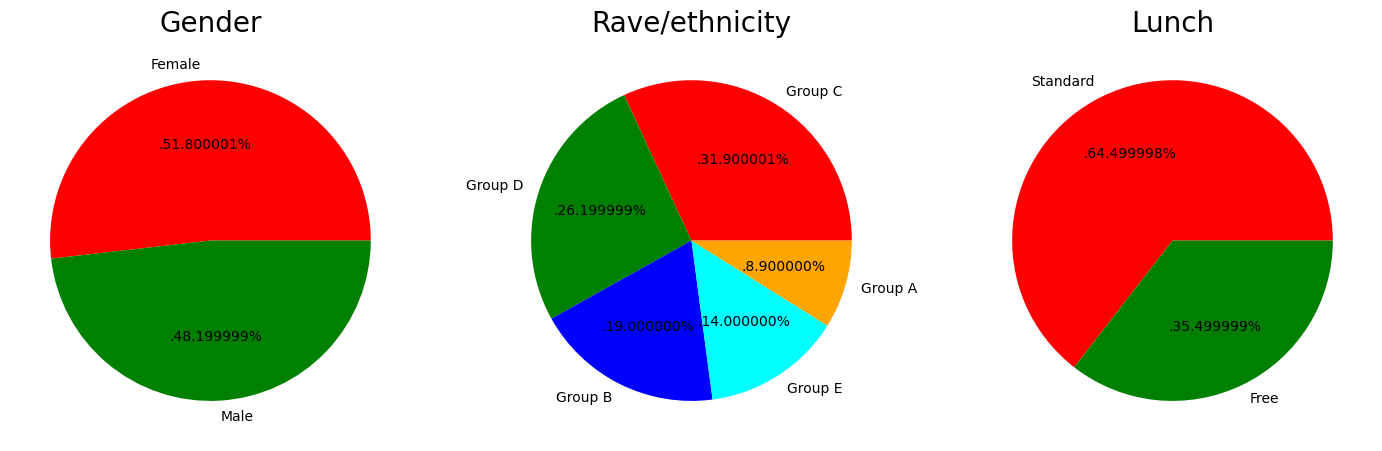

In [58]:
plt.rcParams["figure.figsize"]=(30,12)

plt.subplot(1,5,1)
size=df["gender"].value_counts()
labels="Female","Male"
color=["red","green"]

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Gender",fontsize=20)
plt.axis("off")


plt.subplot(1,5,2)
size=df["race/ethnicity"].value_counts()
labels="Group C","Group D","Group B","Group E","Group A"
color=["red","green","blue","cyan","orange"]

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Rave/ethnicity",fontsize=20)
plt.axis("off")


plt.subplot(1,5,3)
size=df["lunch"].value_counts()
labels="Standard","Free"
color=["red","green"]

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Lunch",fontsize=20)
plt.axis("off")

insight:
number of male and female students is almost same 


In [71]:
numeric_columns = df.select_dtypes(include=["number"])
gender_group = df.groupby("gender")[numeric_columns.columns].mean()
print(gender_group)


        math score  reading score  writing score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


C:\Users\Dell\AppData\Local\Temp\ipykernel_10284\1589491127.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores=[gender_group['average'][0],gender_group["math score"][0]]
C:\Users\Dell\AppData\Local\Temp\ipykernel_10284\1589491127.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores=[gender_group['average'][1],gender_group["math score"][1]]


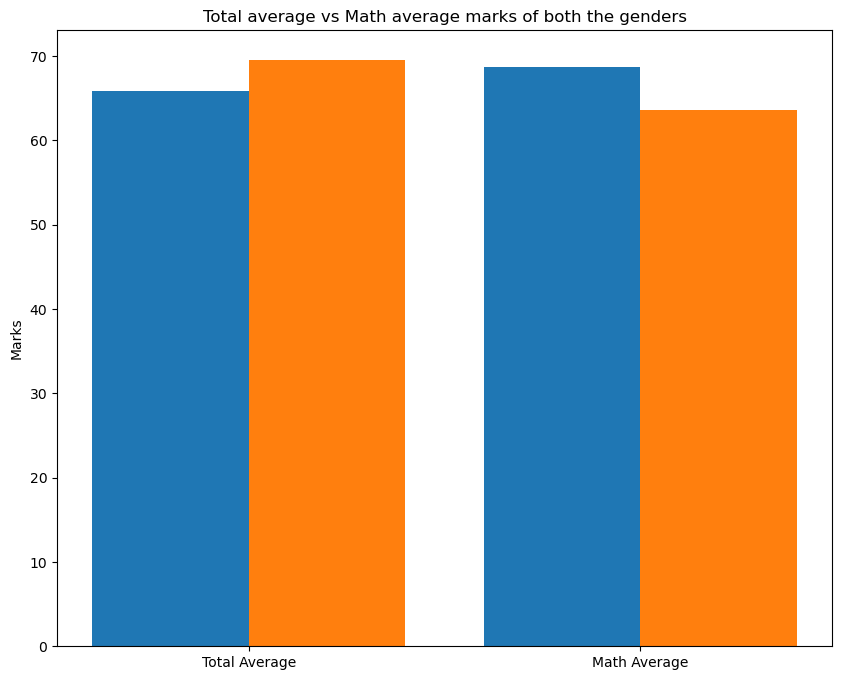

In [81]:
plt.figure(figsize=(10,8))
x=["Total Average","Math Average"]
female_scores=[gender_group['average'][0],gender_group["math score"][0]]
male_scores=[gender_group['average'][1],gender_group["math score"][1]]

x_axis=np.arange(len(x))

plt.bar(x_axis-0.2,male_scores,0.4,label="MAle")
plt.bar(x_axis+0.2,female_scores,0.4,label="Female")

plt.xticks(x_axis,x)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both the genders")
plt.show()

insight: men have performed better in math 
in the total average woman have performed better 

C:\Users\Dell\AppData\Local\Temp\ipykernel_10284\3474296302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["race/ethnicity"],data=df,palette="bright",ax=ax[0],saturation=0.95)


([<matplotlib.patches.Wedge at 0x2d91a30b1d0>,
 [Text(0.592324332246979, 0.9269044640242977, '319'),
  Text(-1.0461621742897658, 0.3399186742226879, '262'),
  Text(-0.49322154359063347, -0.9832255636109514, '190'),
  Text(0.5952333666001212, -0.9250390474384775, '140'),
  Text(1.057281962489778, -0.3035701760610943, '89')])

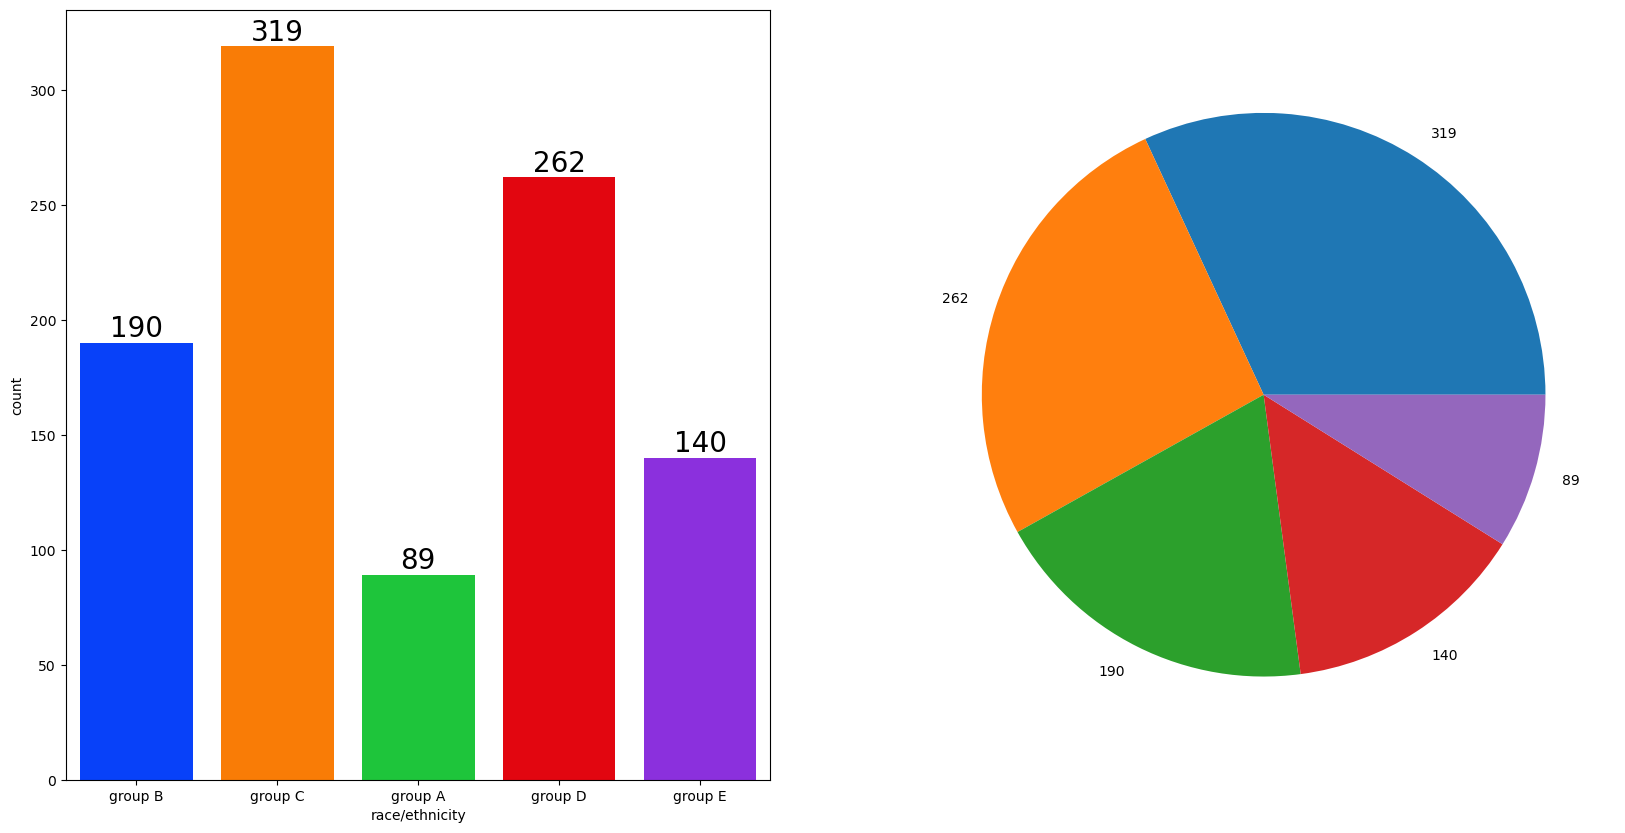

In [85]:
 f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df["race/ethnicity"],data=df,palette="bright",ax=ax[0],saturation=0.95)
for container in ax[0].containers:
   ax[0].bar_label(container,color="black",size=20)

plt.pie(x=df["race/ethnicity"].value_counts(),labels=df["race/ethnicity"].value_counts())

C:\Users\Dell\AppData\Local\Temp\ipykernel_10284\3923327368.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_10284\3923327368.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_10284\3923327368.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


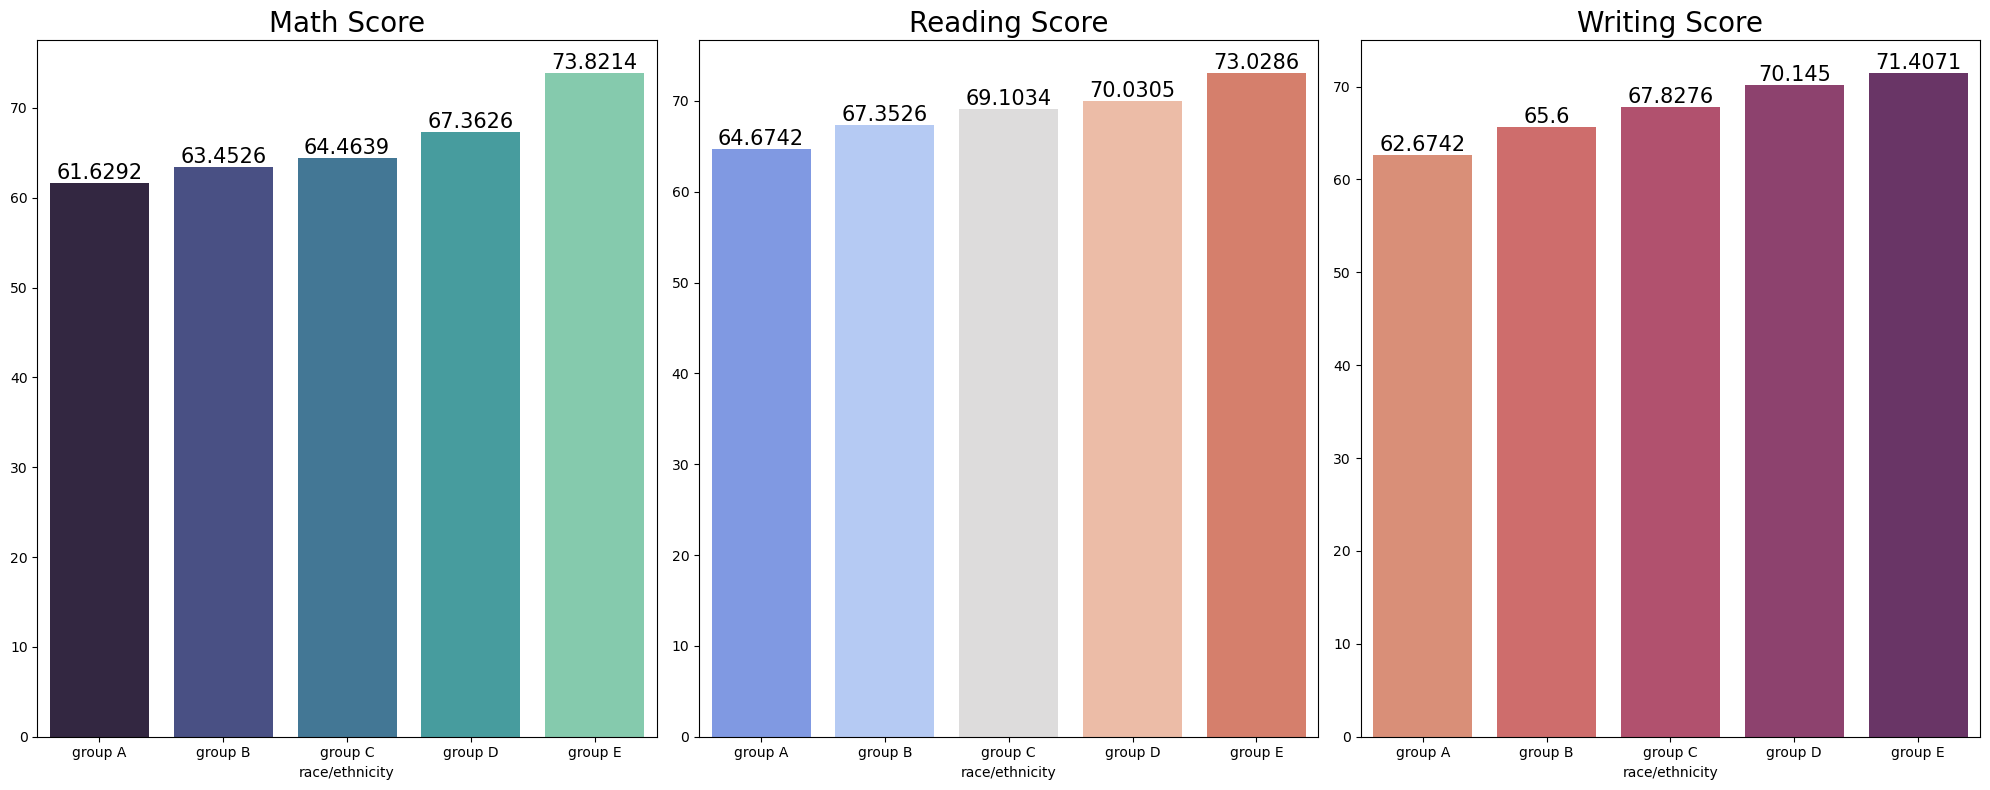

In [95]:
group_data2 = df.groupby('race/ethnicity')

f, ax = plt.subplots(1, 3, figsize=(20, 8))  # Create a grid of 1 row and 3 columns

# Math Score
math_score_means = group_data2["math score"].mean()
sns.barplot(
    x=math_score_means.index,
    y=math_score_means.values,
    palette='mako',
    ax=ax[0]
)
ax[0].set_title("Math Score", size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading Score
reading_score_means = group_data2["reading score"].mean()
sns.barplot(
    x=reading_score_means.index,
    y=reading_score_means.values,
    palette='coolwarm',
    ax=ax[1]
)
ax[1].set_title("Reading Score", size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing Score
writing_score_means = group_data2["writing score"].mean()
sns.barplot(
    x=writing_score_means.index,
    y=writing_score_means.values,
    palette='flare',
    ax=ax[2]
)
ax[2].set_title("Writing Score", size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

insight: group E studenta have secured good marks on an average and group A students have secured least

parental level of education column 

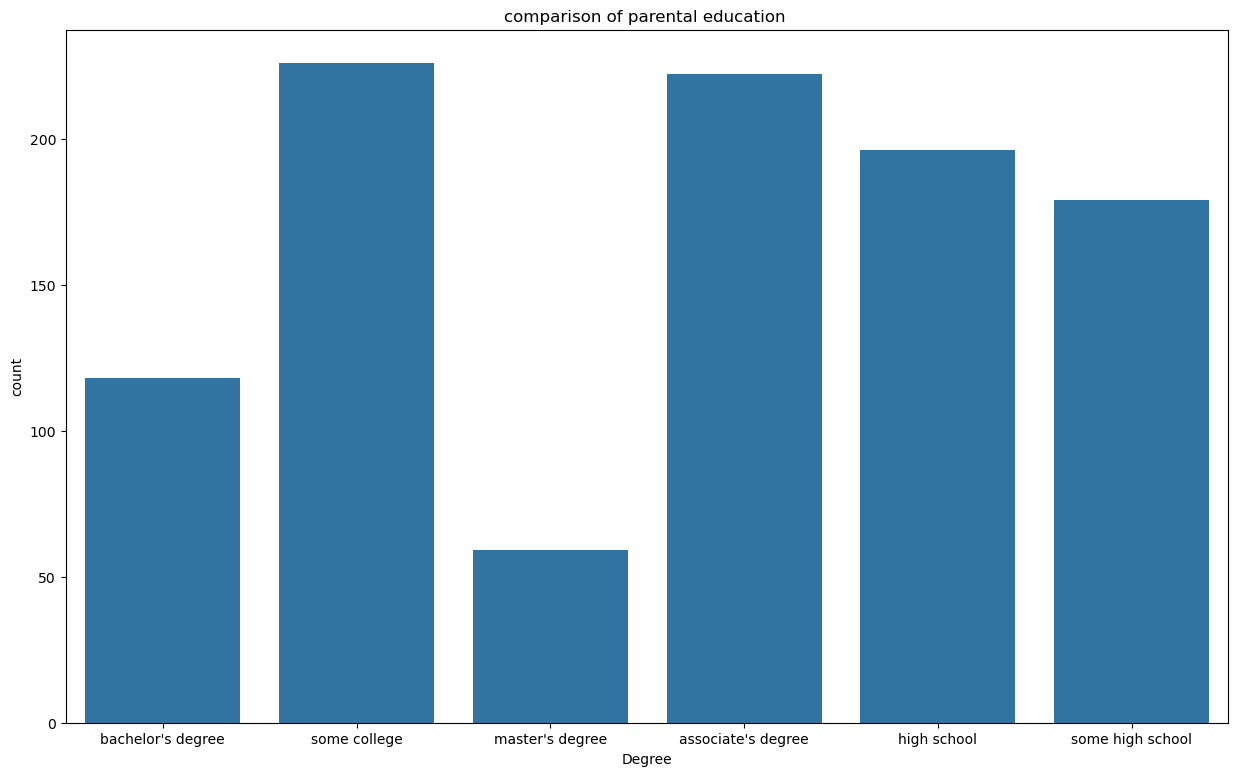

In [102]:
plt.rcParams['figure.figsize'] = [15, 9]

sns.countplot(x=df["parental level of education"])
plt.title("comparison of parental education ")
plt.xlabel("Degree")
plt.ylabel("count")
plt.show()

insight - largest number of parents are from some college 

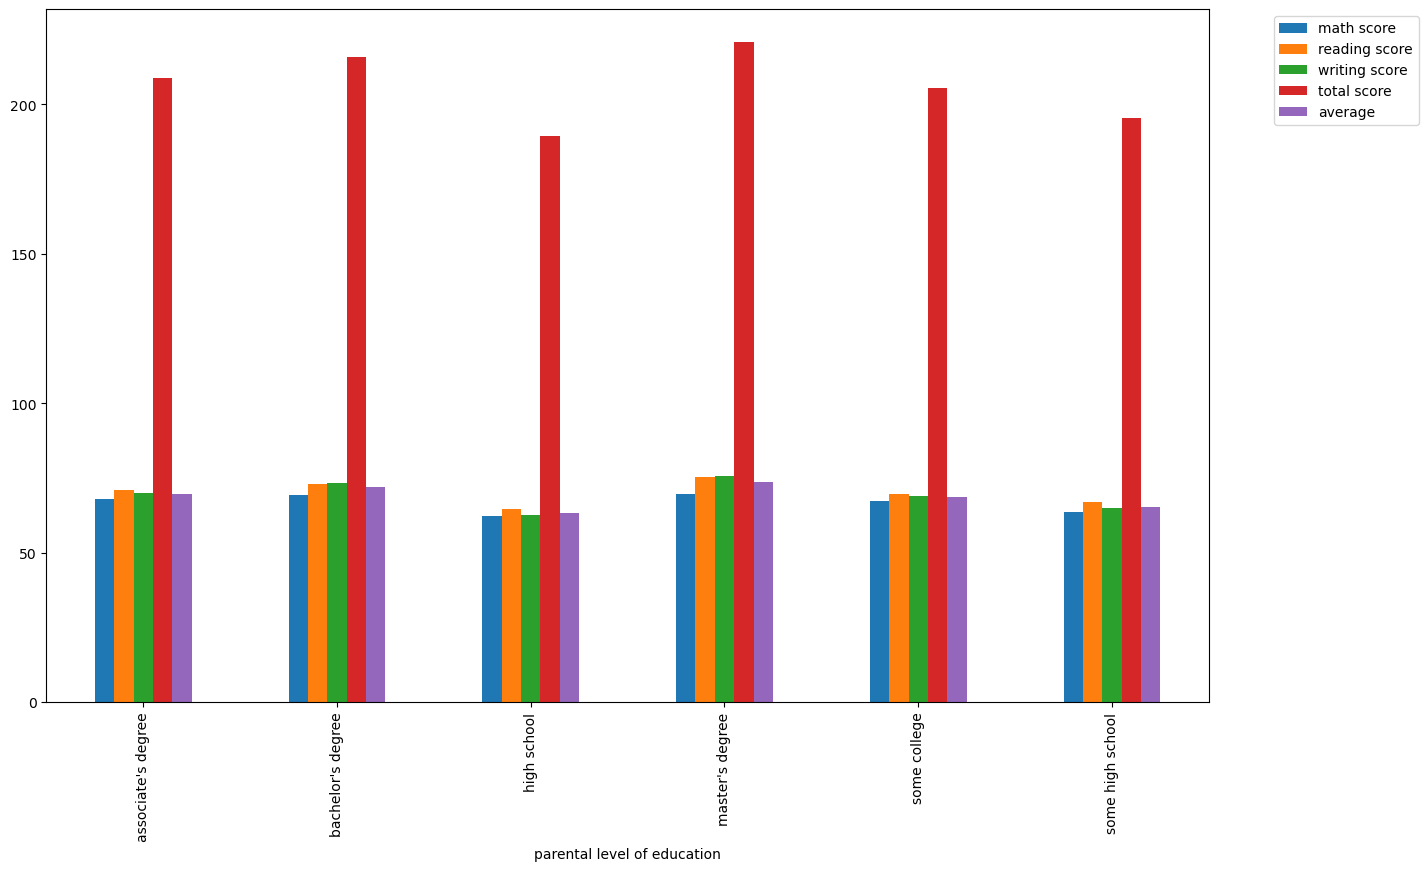

In [106]:
# Select numeric columns before applying the aggregation
numeric_df = df.select_dtypes(include=["number"])

# Group by and calculate the mean only for numeric columns
grouped_mean = numeric_df.groupby(df["parental level of education"]).mean()

# Plot the results
grouped_mean.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


insight-- the score of students whose parents posses master and bachelors have secured more 

Lunch column 

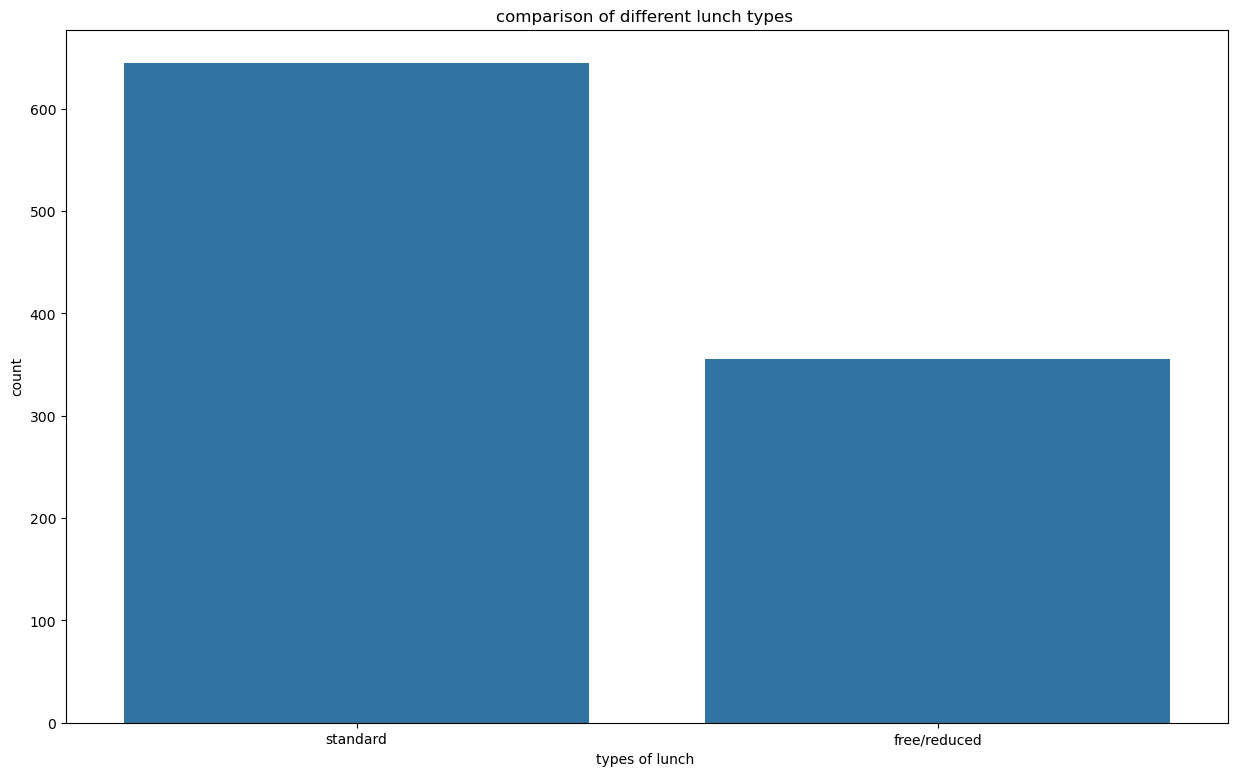

In [107]:
plt.rcParams['figure.figsize'] = [15, 9]

sns.countplot(x=df["lunch"])
plt.title("comparison of different lunch types ")
plt.xlabel("types of lunch ")
plt.ylabel("count")
plt.show()

insight: the standard lunch was consumed more than free lunch 

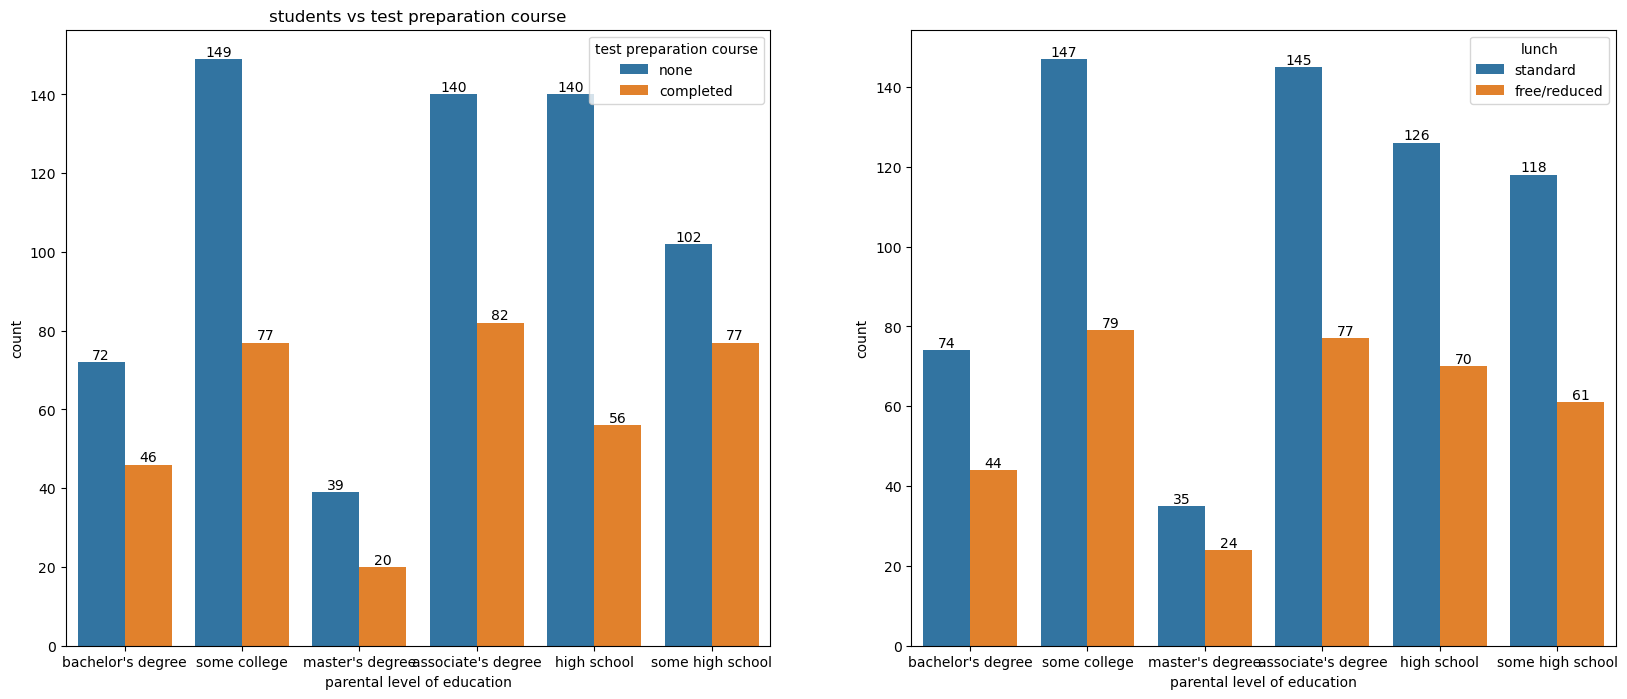

In [111]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df["parental level of education"],data=df,hue="test preparation course",ax=ax[0])
ax[0].set_title("students vs test preparation course")

for container in ax[0].containers:
    ax[0].bar_label(container)

sns.countplot(x=df["parental level of education"],data=df,hue="lunch",ax=ax[1])

for container in ax[1].containers:
    ax[1].bar_label(container)





insight:
students getting standard lunch tend ti score better 

<Axes: xlabel='lunch', ylabel='writing score'>

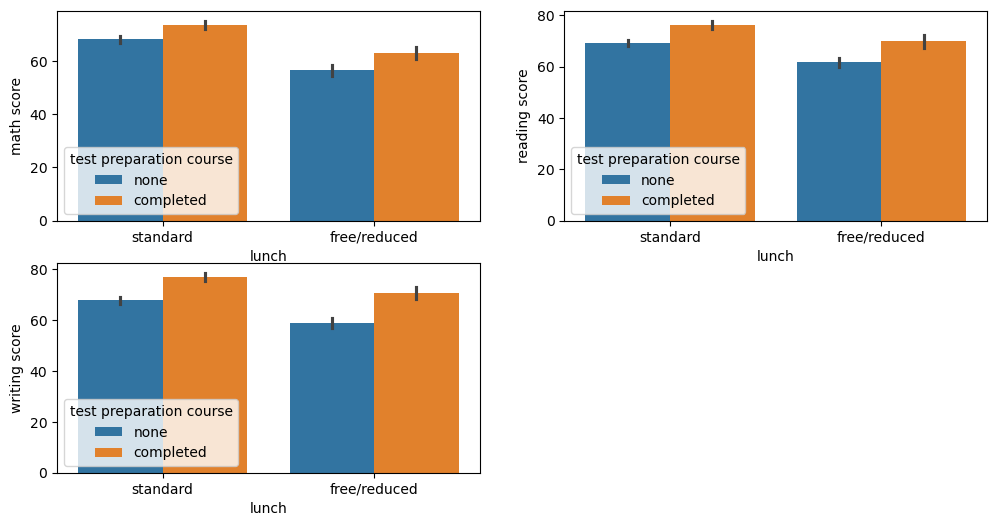

In [120]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df["lunch"],y=df["math score"],hue=df["test preparation course"])

plt.subplot(2,2,2)
sns.barplot(x=df["lunch"],y=df["reading score"],hue=df["test preparation course"])

plt.subplot(2,2,3)
sns.barplot(x=df["lunch"],y=df["writing score"],hue=df["test preparation course"])

insight-the students who have completed the course tend to have secured higher marks\

OUTLIERS:


<Axes: xlabel='average'>

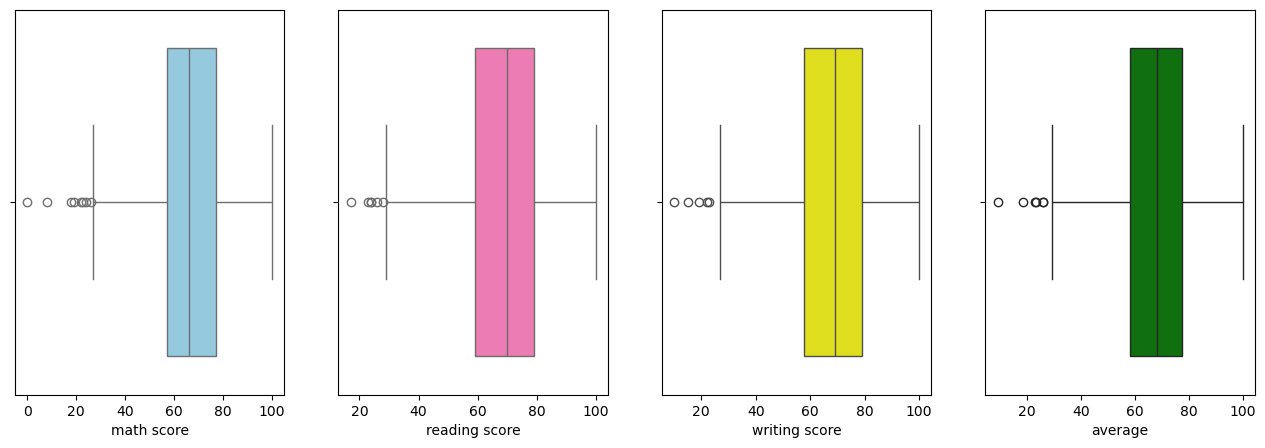

In [123]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(1,4,1)
sns.boxplot(x=df["math score"],color="skyblue")

plt.subplot(1,4,2)
sns.boxplot(x=df["reading score"],color="hotpink")

plt.subplot(1,4,3)
sns.boxplot(x=df["writing score"],color="yellow")

plt.subplot(1,4,4)
sns.boxplot(x=df["average"],color="green")